# Installing packages, Loading and inspecting dataset to have a sneak peek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To avoid encoding error (ENC), using "unicode_escape"
df=pd.read_csv("C:\\Users\\bafna\\OneDrive\\Desktop\\Sales Data.csv", encoding = "unicode_escape")

In [4]:
df.shape

(11251, 15)

In [6]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


# Data cleaning and preparing for analysis

In [5]:
# Checking the data to analyze the need for cleaning areas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# dropping the balnk and/or unrelated columns and saving the dataframe
df.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [7]:
# Rechecking the data shape after dropping the unrelated columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
# Rechecking the shape of dataframe to see the changes in dataframe after dropping the nulls
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
# Changing the data type from float to integer
df["Amount"] = df ["Amount"]. astype("int")

In [11]:
# Checking data type after the conversion
df["Amount"].dtypes

dtype('int32')

In [12]:
# Checking the column names to determine the need for further conversion or changes
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
# Renaming column for more clarity 
df.rename(columns = {"Cust_name": "Customer_name", "Marital_Status": "Relationship_Status"}, inplace = True)

In [15]:
# Rechecking column names after renaming
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Relationship_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [16]:
# Using describe() to check the descripton of "Orders" and "Amount" column
df[["Orders","Amount"]].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

## Based on Gender

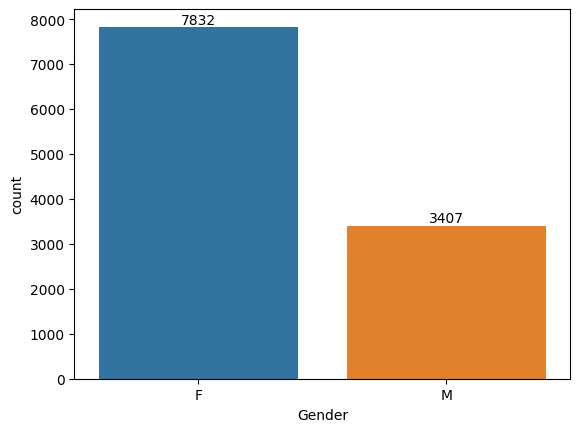

In [17]:
# Checking order placement data for potential patterns or trends in purchasing behavior across genders
ax = sns.countplot(x = "Gender", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

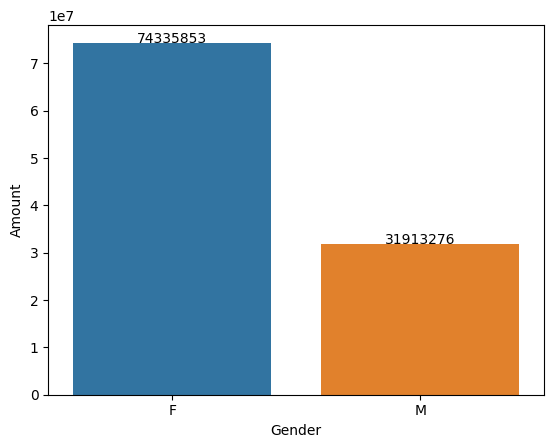

In [18]:
# Checking order placement data for potential patterns or trends in purchasing power across genders
sales_gen = df.groupby(["Gender"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

ax = sns.barplot(x = "Gender", y = "Amount", data = sales_gen)

for index, row in sales_gen.iterrows():
    ax.text(index, row["Amount"], row["Amount"], ha="center")

Based on the above-mentioned graphs, it is evident that the majority of the purchasers are female and that the purchasing power of females surpasses that of males.

# Based on Age

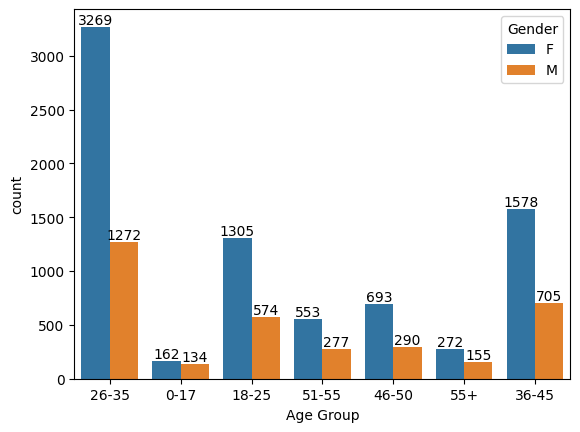

In [19]:
# Checking order placement data for potential patterns or trends in purchasing behavior based on "Age Groups"
ax = sns.countplot(x = "Age Group", data = df, hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

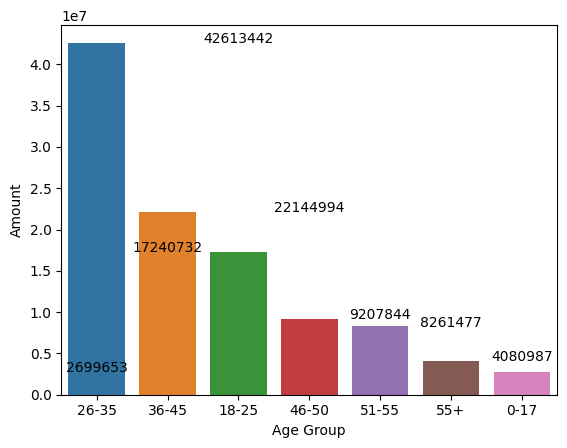

In [20]:
# Checking order placement data for potential patterns or trends in purchasing power across "Age Groups"
sales_age = df.groupby(["Age Group"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

ax = sns.barplot(x = "Age Group", y = "Amount", data = sales_age)

for index, row in sales_age.iterrows():
    ax.text(index, row["Amount"], row["Amount"], ha="center")

The chart presented above indicates that the age group of 26-35 made the highest number of purchases, while the age group of 55+ made the least number of purchases. Moreover, the data shows that females are the primary purchasers across all age groups, regardless of age range.

## Based on States

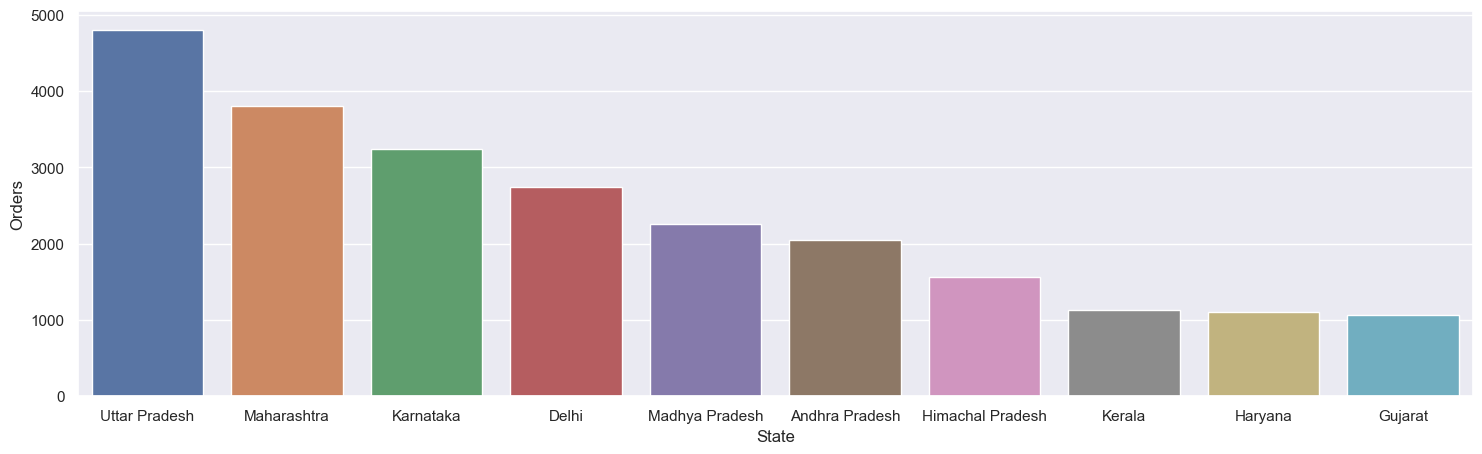

In [21]:
# Checking total number of orders from top 10 states 
sales_state = df.groupby(["State"], as_index = False) ["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "State", y = "Orders", data = sales_state)

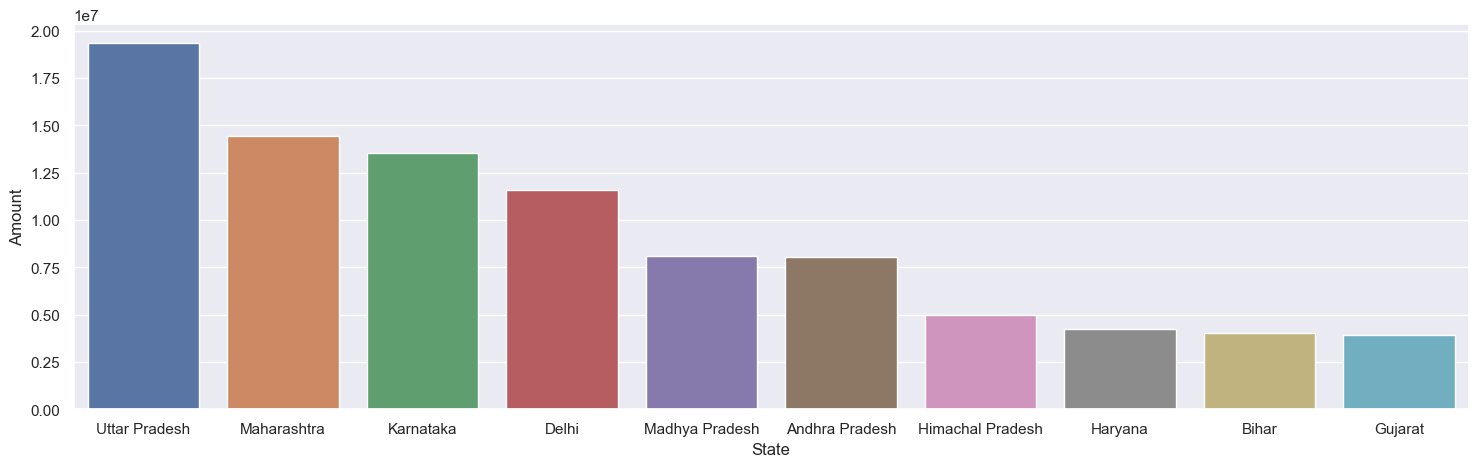

In [22]:
# Checking top 10 states based on Amount spent
sales_state = df.groupby(["State"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "State", y = "Amount", data = sales_state)

Based on the above graphs, it is evident that the states of Uttar Pradesh, Maharashtra, and Karnataka contribute significantly to the majority of the orders and total sales/amount.

## Based on Relationship Statsu

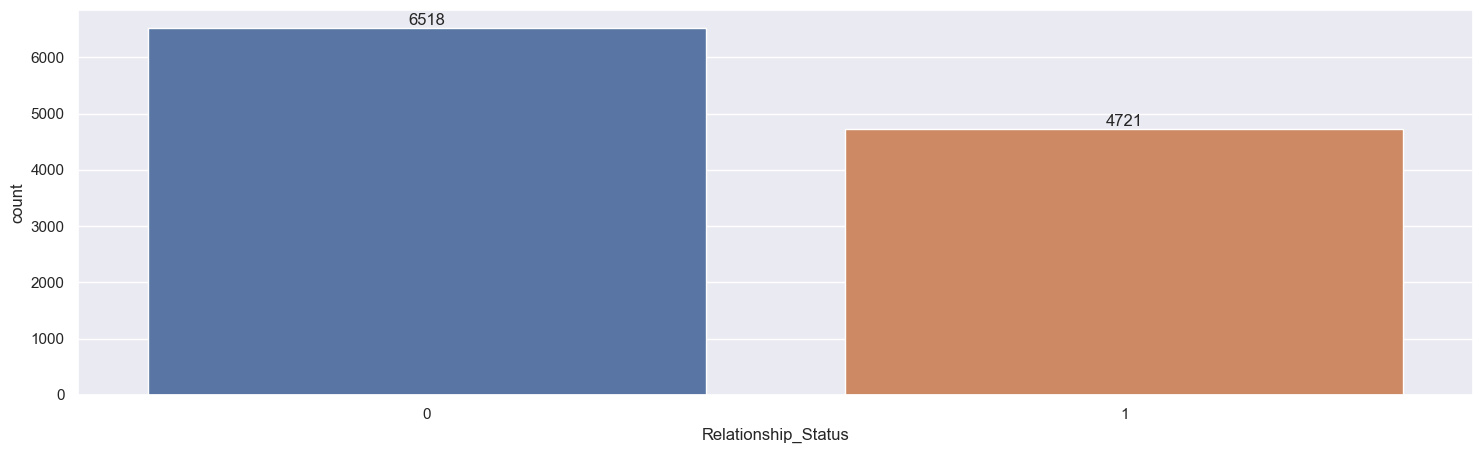

In [23]:
# Checking the order pattern based on relationship status 
ax = sns.countplot(x = "Relationship_Status", data = df)

sns.set(rc={"figure.figsize":(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)

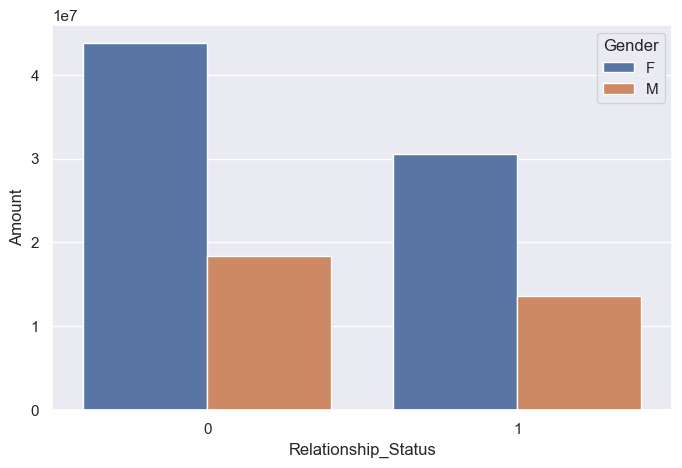

In [24]:
# Checking the pattern of Amount spent based on relationship status and gender
sales_state = df.groupby(["Relationship_Status", "Gender"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(8,5)})
ax = sns.barplot(x = "Relationship_Status", y = "Amount", data = sales_state, hue = "Gender")

Based on the above graphs, it is evident that the majority of the buyers are married women, and they possess a high purchasing power.

## Based on Occupation

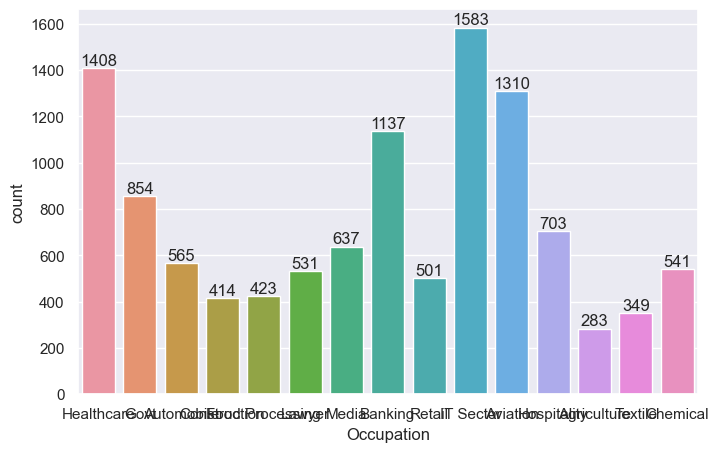

In [25]:
# Checking the order pattern based on Occupation
ax = sns.countplot(x = "Occupation", data = df)

sns.set(rc={"figure.figsize":(18,5)})
for bars in ax.containers:
    ax.bar_label(bars)

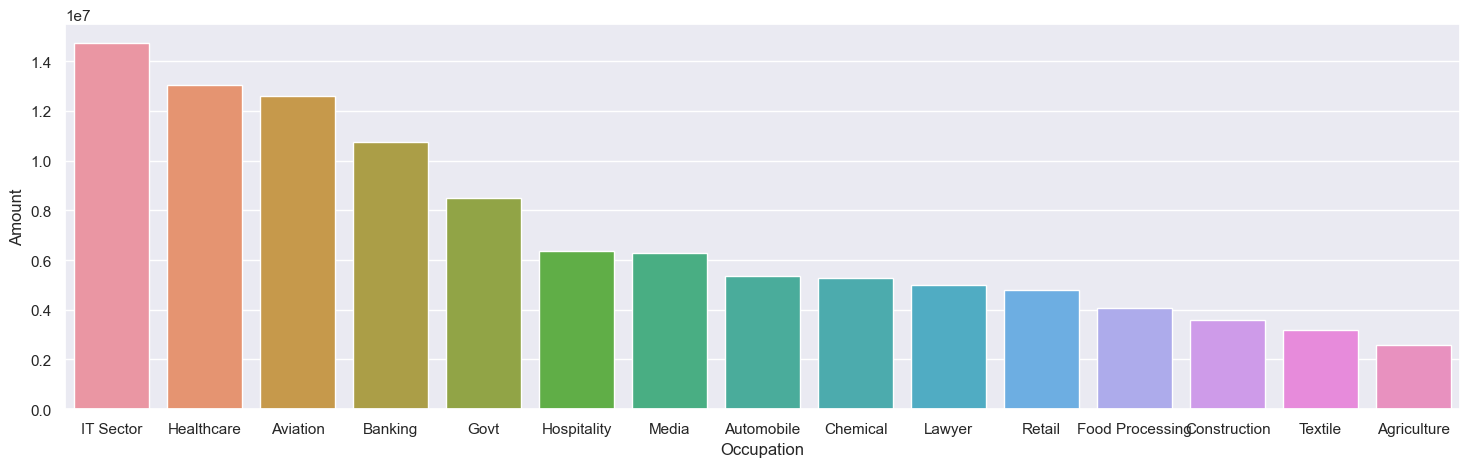

In [26]:
# Checking the pattern of Amount spent based on Occupation
sales_state = df.groupby(["Occupation"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "Occupation", y = "Amount", data = sales_state)

Based on the graphical data presented, it is evident that a significant proportion of buyers operate within the Information Technology, Healthcare, and Aviation industries.

## Based on Product Category 

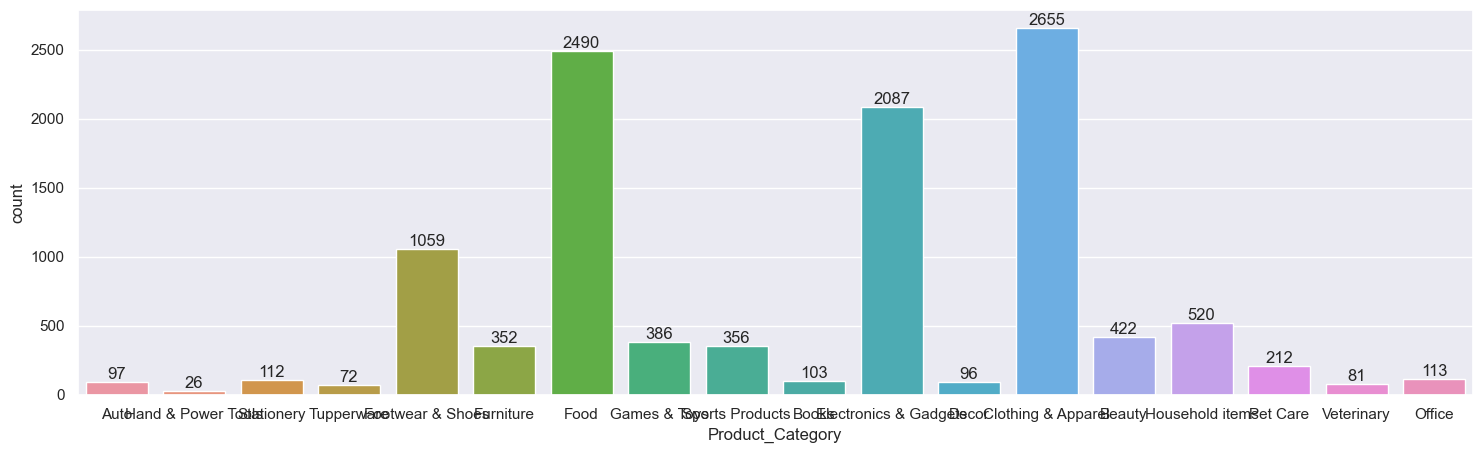

In [27]:
# Checking the order pattern based on Product_Category
ax = sns.countplot(x = "Product_Category", data = df)

sns.set(rc={"figure.figsize":(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

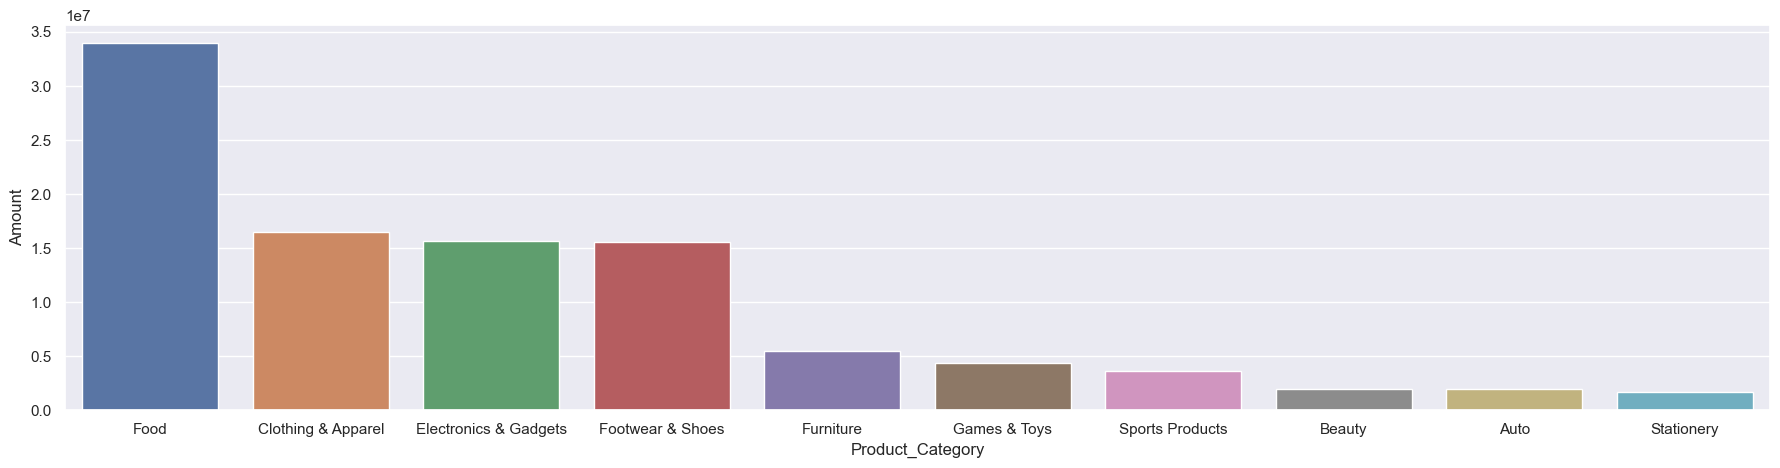

In [28]:
# Checking the pattern of Amount spent based on Product_Category
sales_state = df.groupby(["Product_Category"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(22,5)})
ax = sns.barplot(x = "Product_Category", y = "Amount", data = sales_state)

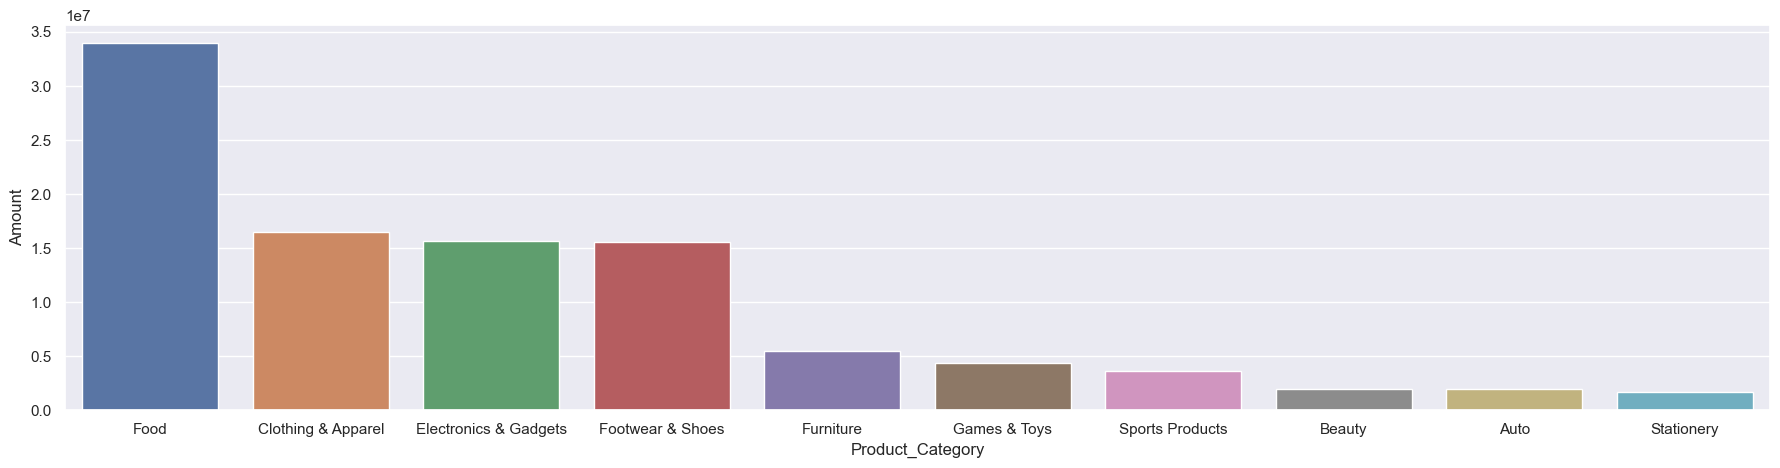

In [29]:
# Checking the pattern of Amount spent based on Product_Category
sales_state = df.groupby(["Product_Category"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(22,5)})
ax = sns.barplot(x = "Product_Category", y = "Amount", data = sales_state)

The aforementioned graphs indicate that the majority of products sold fall under the categories of Food, Clothing, and Electronics.

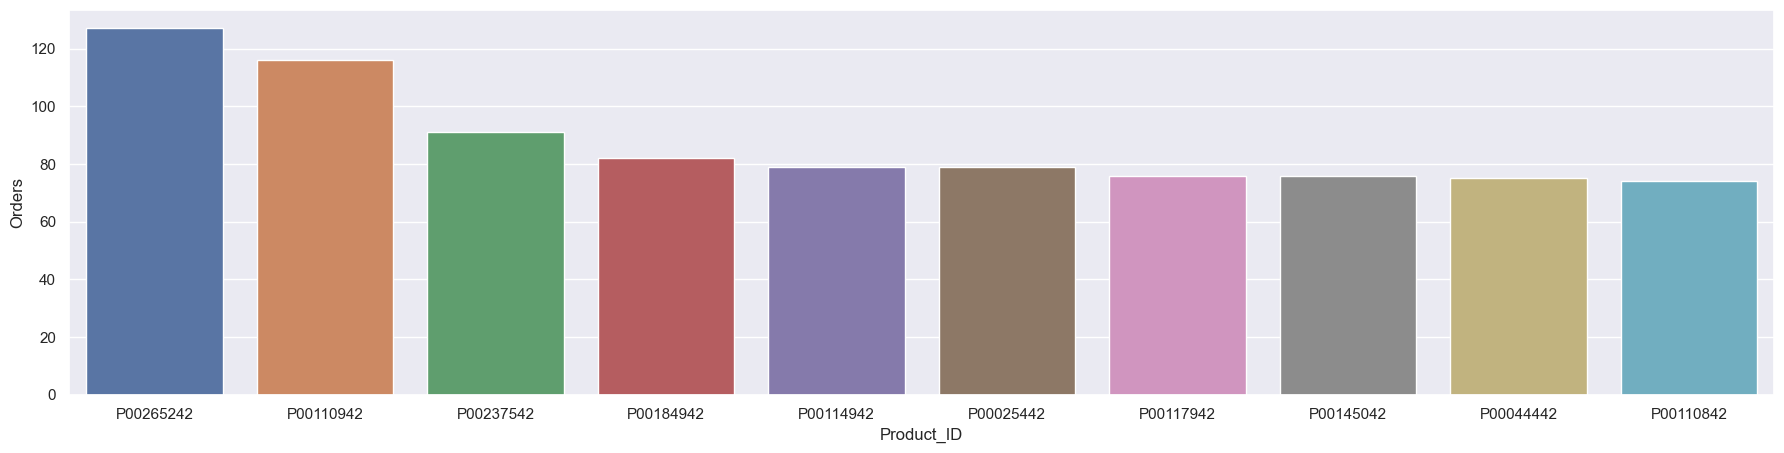

In [30]:
# Checking the top 10 soled products based on Product_ID
sales_state = df.groupby(["Product_ID"], as_index = False) ["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(22,5)})
ax = sns.barplot(x = "Product_ID", y = "Orders", data = sales_state)

## Conclusion

According to the analyzed data it can be determined that Female individuals who are married and aged between 26 and 35 years and who work within the Information Technology, Healthcare, and Aviation sectors in the states of Uttar Pradesh, Maharashtra, and Karnataka, have a higher propensity to purchase products from the categories of Food, Clothing, and Electronics.

# Project Learnings

1. Executed data cleaning and manipulation procedures.
2. Conducted exploratory data analysis (EDA) utilizing the pandas, matplotlib, and seaborn libraries.
3. Enhanced the customer experience by identifying prospective customers among diverse states, occupations, genders, and age groups.
4. Boosted sales by identifying the highest selling product categories and products, thereby facilitating inventory planning to meet demand.

In [1]:
pip install pandoc

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandoc (from versions: none)
ERROR: No matching distribution found for pandoc
